<div style="text-align: right"> <b>[M1 info ML] Réduction de dimensions - 2020/2021</b> </div>
<div style="text-align: right"> <b>TDTP2</b> </div>
<div style="text-align: right"> <a href="mailto:mohamed.maouche@univ-lille.fr"> M. Maouche </a> </div>



# Génération de datasets

Dans un premier temps l'objectif de ce TP est de vous familiariser avec les outils python afin de créer des jeux de données synthétiques qui vous permettent d’investiguer les avantages et inconvénients des méthodes de réduction de dimensions.

Attention : Dans toute la suite du TP faites en sorte d'avoir une variable global ```npoints=1000``` pour pouvoir modifier le nombre de points générer de tout les datasets générés en une fois.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn')


from sklearn.datasets import make_circles, make_moons, make_s_curve, make_swiss_roll
from sklearn.utils import check_random_state

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
npoints = 1000
gen_datasets = {}

## Familiarisation avec ```sklearn.datasets```

Vous trouverez dans [sklearn.datasets](https://scikit-learn.org/stable/datasets.html#datasets), un ensemble d'outils et de fonctions vous permettant de charger des datasets réels populaires mais aussi pour la création de dataset avec des formats particuliers. 

1 - Utilisez ```from sklearn.datasets import make_circles``` pour construire un exemple similaire à la figure en dessous (2 classes).
![circles](img/circles.png)

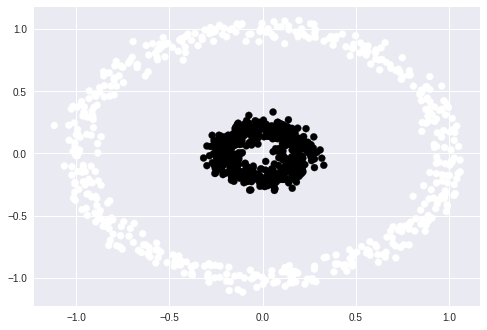

In [3]:
X_circles, y_circles = make_circles(n_samples=npoints, factor=.2, noise=.05, random_state=42)
plt.scatter(X_circles[:,0] ,X_circles[:,1], c=y_circles)
plt.show()

gen_datasets['circles'] = {'x': X_circles, 'y': y_circles}

2 - Utilisez ```from sklearn.datasets import make_moons``` pour construire un exemple similaire à la figure en dessous (2 classes).
![Moons](img/moons.png)

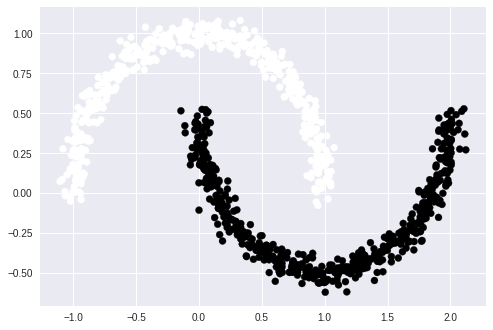

In [4]:
X_moons, y_moons =  make_moons(n_samples=npoints, noise=.05, random_state=42)
plt.scatter(X_moons[:,0] ,X_moons[:,1], c=y_moons)
plt.show()

gen_datasets['moons'] = {'x': X_moons, 'y': y_moons}

3 - Utilisez ```from sklearn.datasets import make_s_curve``` pour construire un exemple similaire à la figure en dessous (aucune classe).

Info : Pour faire des figures 3D, pensez à ``` ax = plt.axes(projection='3d')```.
![scurve](img/scurve.png)

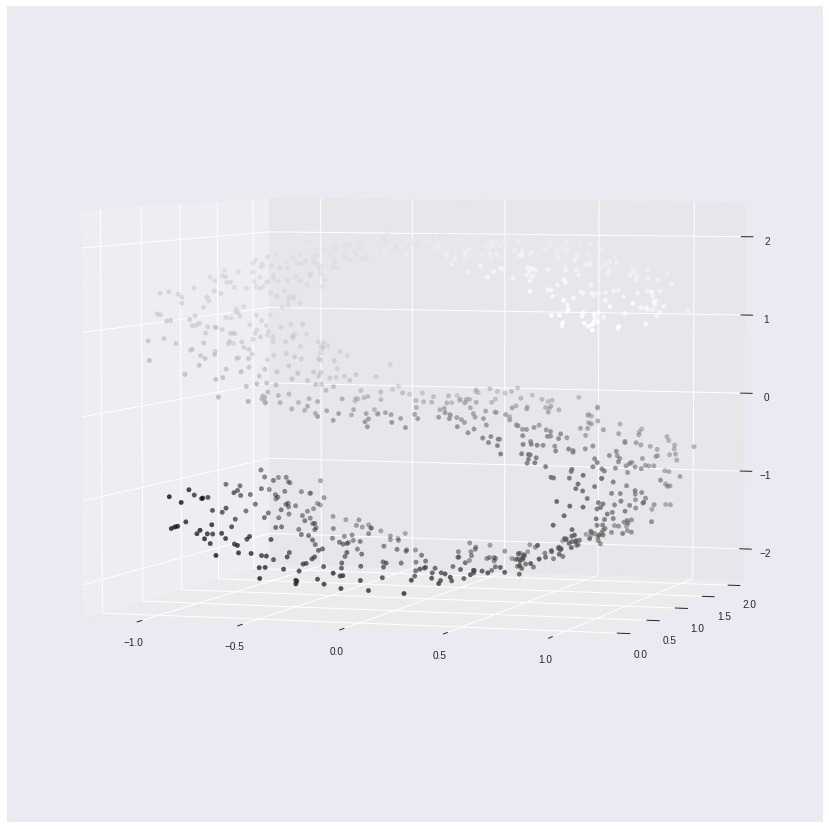

In [5]:
X_scurve, y_scurve = make_s_curve(n_samples=npoints, noise=.05, random_state=42)
        
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.scatter(X_scurve[:, 0], X_scurve[:, 1], X_scurve[:, 2], c=y_scurve)
ax.view_init(4, -72)

gen_datasets['scurve'] = {'x': X_scurve, 'y': y_scurve}

4 - Reprenez vos données en forme de  S-curve pour construire un exemple similaire à la figure en dessous mais divisez le dataset en 3 classes.
![scurve3](img/scurve_3classes.png)

In [6]:
def make_3_intrvl(y):
    y_min = np.min(y)
    y_max = np.max(y)
    intrvl = np.abs(y_max - y_min)/3

    y_pred = []
    for i in range(len(y)):
        if y_min <= y[i] < y_min + intrvl:
            y_pred += [0]
        elif y_min + intrvl <= y[i] < y_min + 2*intrvl:
            y_pred += [1]
        else:
            y_pred += [2]
    return y_pred

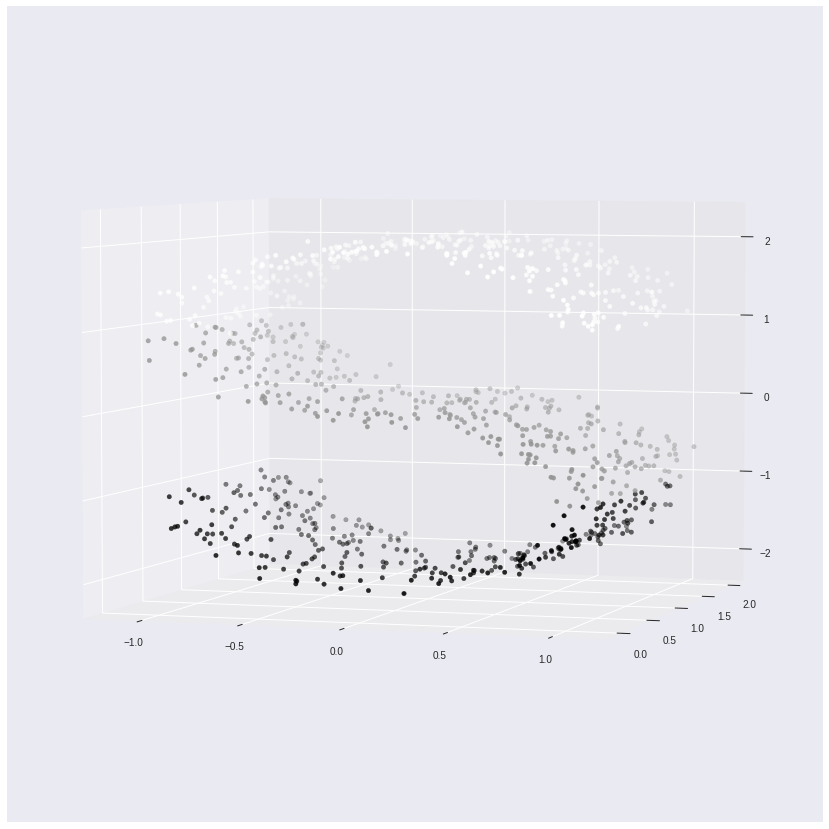

In [7]:
y_pred = make_3_intrvl(y_scurve)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.scatter(X_scurve[:, 0], X_scurve[:, 1], X_scurve[:, 2], c=y_pred)
ax.view_init(4, -72)

gen_datasets['scurve']['y'] = y_pred

5 - Une autre forme bien  connu est le swiss roll à créer avec ```from sklearn.datasets import make_swiss_roll```
Produisez donc la forme ci-dessous (en créant 3 classes avec).
![swiss](img/swiss.png)
![swiss3](img/swiss_3classes.png)

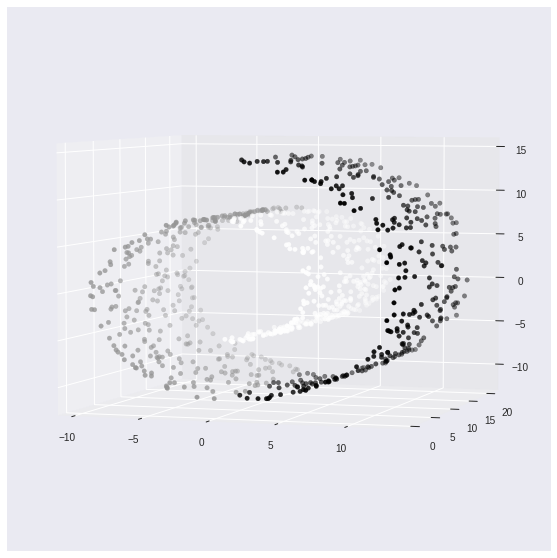

In [8]:
X_swissroll, y_swissroll = make_swiss_roll(n_samples=npoints, noise=.05, random_state=42)
y_pred_swissroll = make_3_intrvl(y_swissroll)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(X_swissroll[:, 0], X_swissroll[:, 1], X_swissroll[:, 2], c=y_pred_swissroll)
ax.view_init(4, -72)

gen_datasets['swissroll'] = {'x': X_swissroll, 'y': y_pred_swissroll}

## Générer nos propres exemples
Nous pouvons aussi créer des formes intéressantes

6 - Construisez la figure "grille" ci-dessous.
![grille](img/grille.png) ![grille3](img/grille_3classes.png)


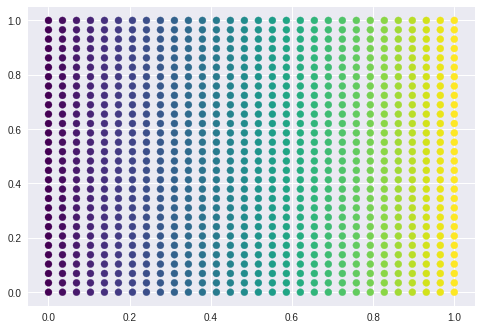

In [9]:
x = np.linspace(0,1,30)
y = np.linspace(0,1,30)

grid1 = np.array([ [a,b] for a in x for b in y])

plt.scatter(grid1[:,0], grid1[:,1], c=grid1[:,0], cmap='viridis')
gen_datasets['grid1'] = {'x': grid1, 'y': grid1[:,1]}

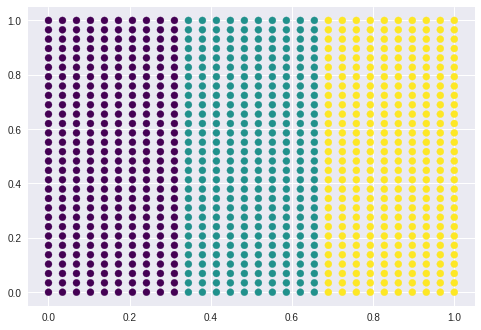

In [10]:
x = np.linspace(0,1,30)
y = np.linspace(0,1,30)

grid2 = np.array([ [a,b] for a in x for b in y])
pred = make_3_intrvl(grid2[:,0])

plt.scatter(grid2[:,0], grid2[:,1], c=pred, cmap='viridis')
gen_datasets['grid2'] = {'x': grid2, 'y': pred}

7 - Construisez la figure "sphere" ci-dessous.

Conseil : avec des coordonées polaires c'est très facile !
![sphere](img/sphere.png) ![sphere3](img/sphere_3classes.png)


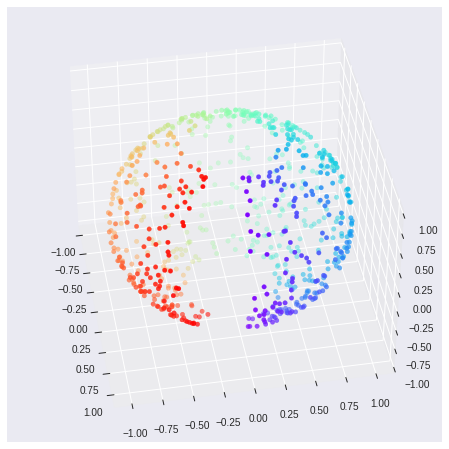

In [11]:
# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(npoints) * (2 * np.pi - 0.55)
t = random_state.rand(npoints) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

gen_datasets['sphere1'] = {'x': np.array([x,y,z]).T, 'y': p[indices]}

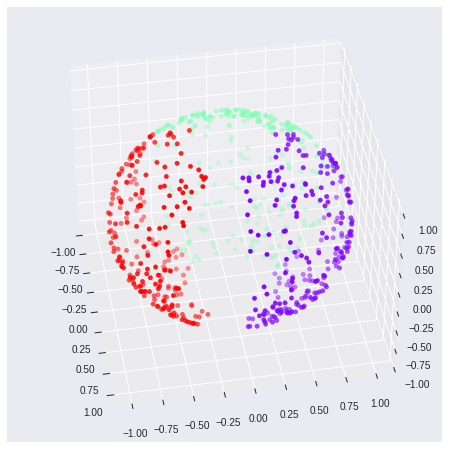

In [12]:
# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(npoints) * (2 * np.pi - 0.55)
t = random_state.rand(npoints) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

pred = make_3_intrvl(p[indices]) 

# Plot our dataset.
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=pred, cmap=plt.cm.rainbow)
ax.view_init(40, -10)

gen_datasets['sphere2'] = {'x': np.array([x,y,z]).T, 'y': pred}

##  Datasets réels

In [13]:
## Je remercie les auteurs de ces fonctions:
#          Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import datasets
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

gen_datasets['digits'] = {'x': X, 'y': y}

([], [])

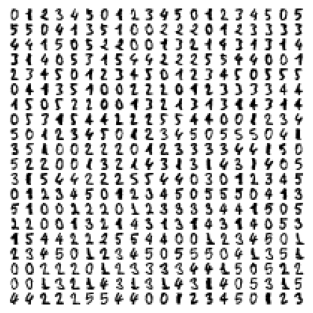

In [14]:
# ----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])

Vous trouverez ci-dessous une fonction permettant d'afficher le dataset digits avec des annotations pour repérer les différents chiffres.

In [15]:
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X,y,digits, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Dans la figure ci-dessous on applique cette fonction pour dessiner une projection fictive aléatoire de digits.

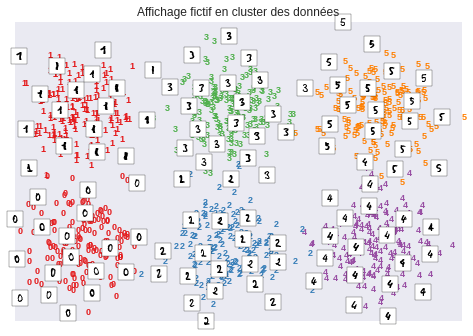

In [16]:
std = 0.2
newU =np.vstack((y//2 , y%2)).T
arr = newU + std * np.random.randn(newU.shape[0],newU.shape[1])
plot_embedding(arr,y,digits,"Affichage fictif en cluster des données")

# Visualisation des effets des méthodes de réduction de dimensions

8 - Servez vous des methodes ```PCA```, ```KPCA```, ```LDA```,```TSNE``` sur l'ensemble des datasets précédents (i.e., Cercle, Lune, S-curve, Swiss-roll, Grille, Sphere et Digits) pour avoir une nouvelle représentation 2D et/ou 1D. 
Discutez les différents cas.

9 6
circles  ....
0 0
0 1
0 2
0 3
0 4
0 5
moons  ....
1 0
1 1
1 2
1 3
1 4
1 5
scurve  ....
2 0
2 1
2 2
2 3
2 4
2 5
swissroll  ....
3 0
3 1
3 2
3 3
3 4
3 5
grid1  ....
4 0
4 1
4 2
4 3
4 4
4 5
grid2  ....
5 0
5 1
5 2
5 3
5 4
5 5
sphere1  ....
6 0
6 1
6 2
6 3
6 4
6 5
sphere2  ....
7 0
7 1
7 2
7 3
7 4
7 5
digits  ....
8 0
8 1
8 2
8 3
8 4
8 5


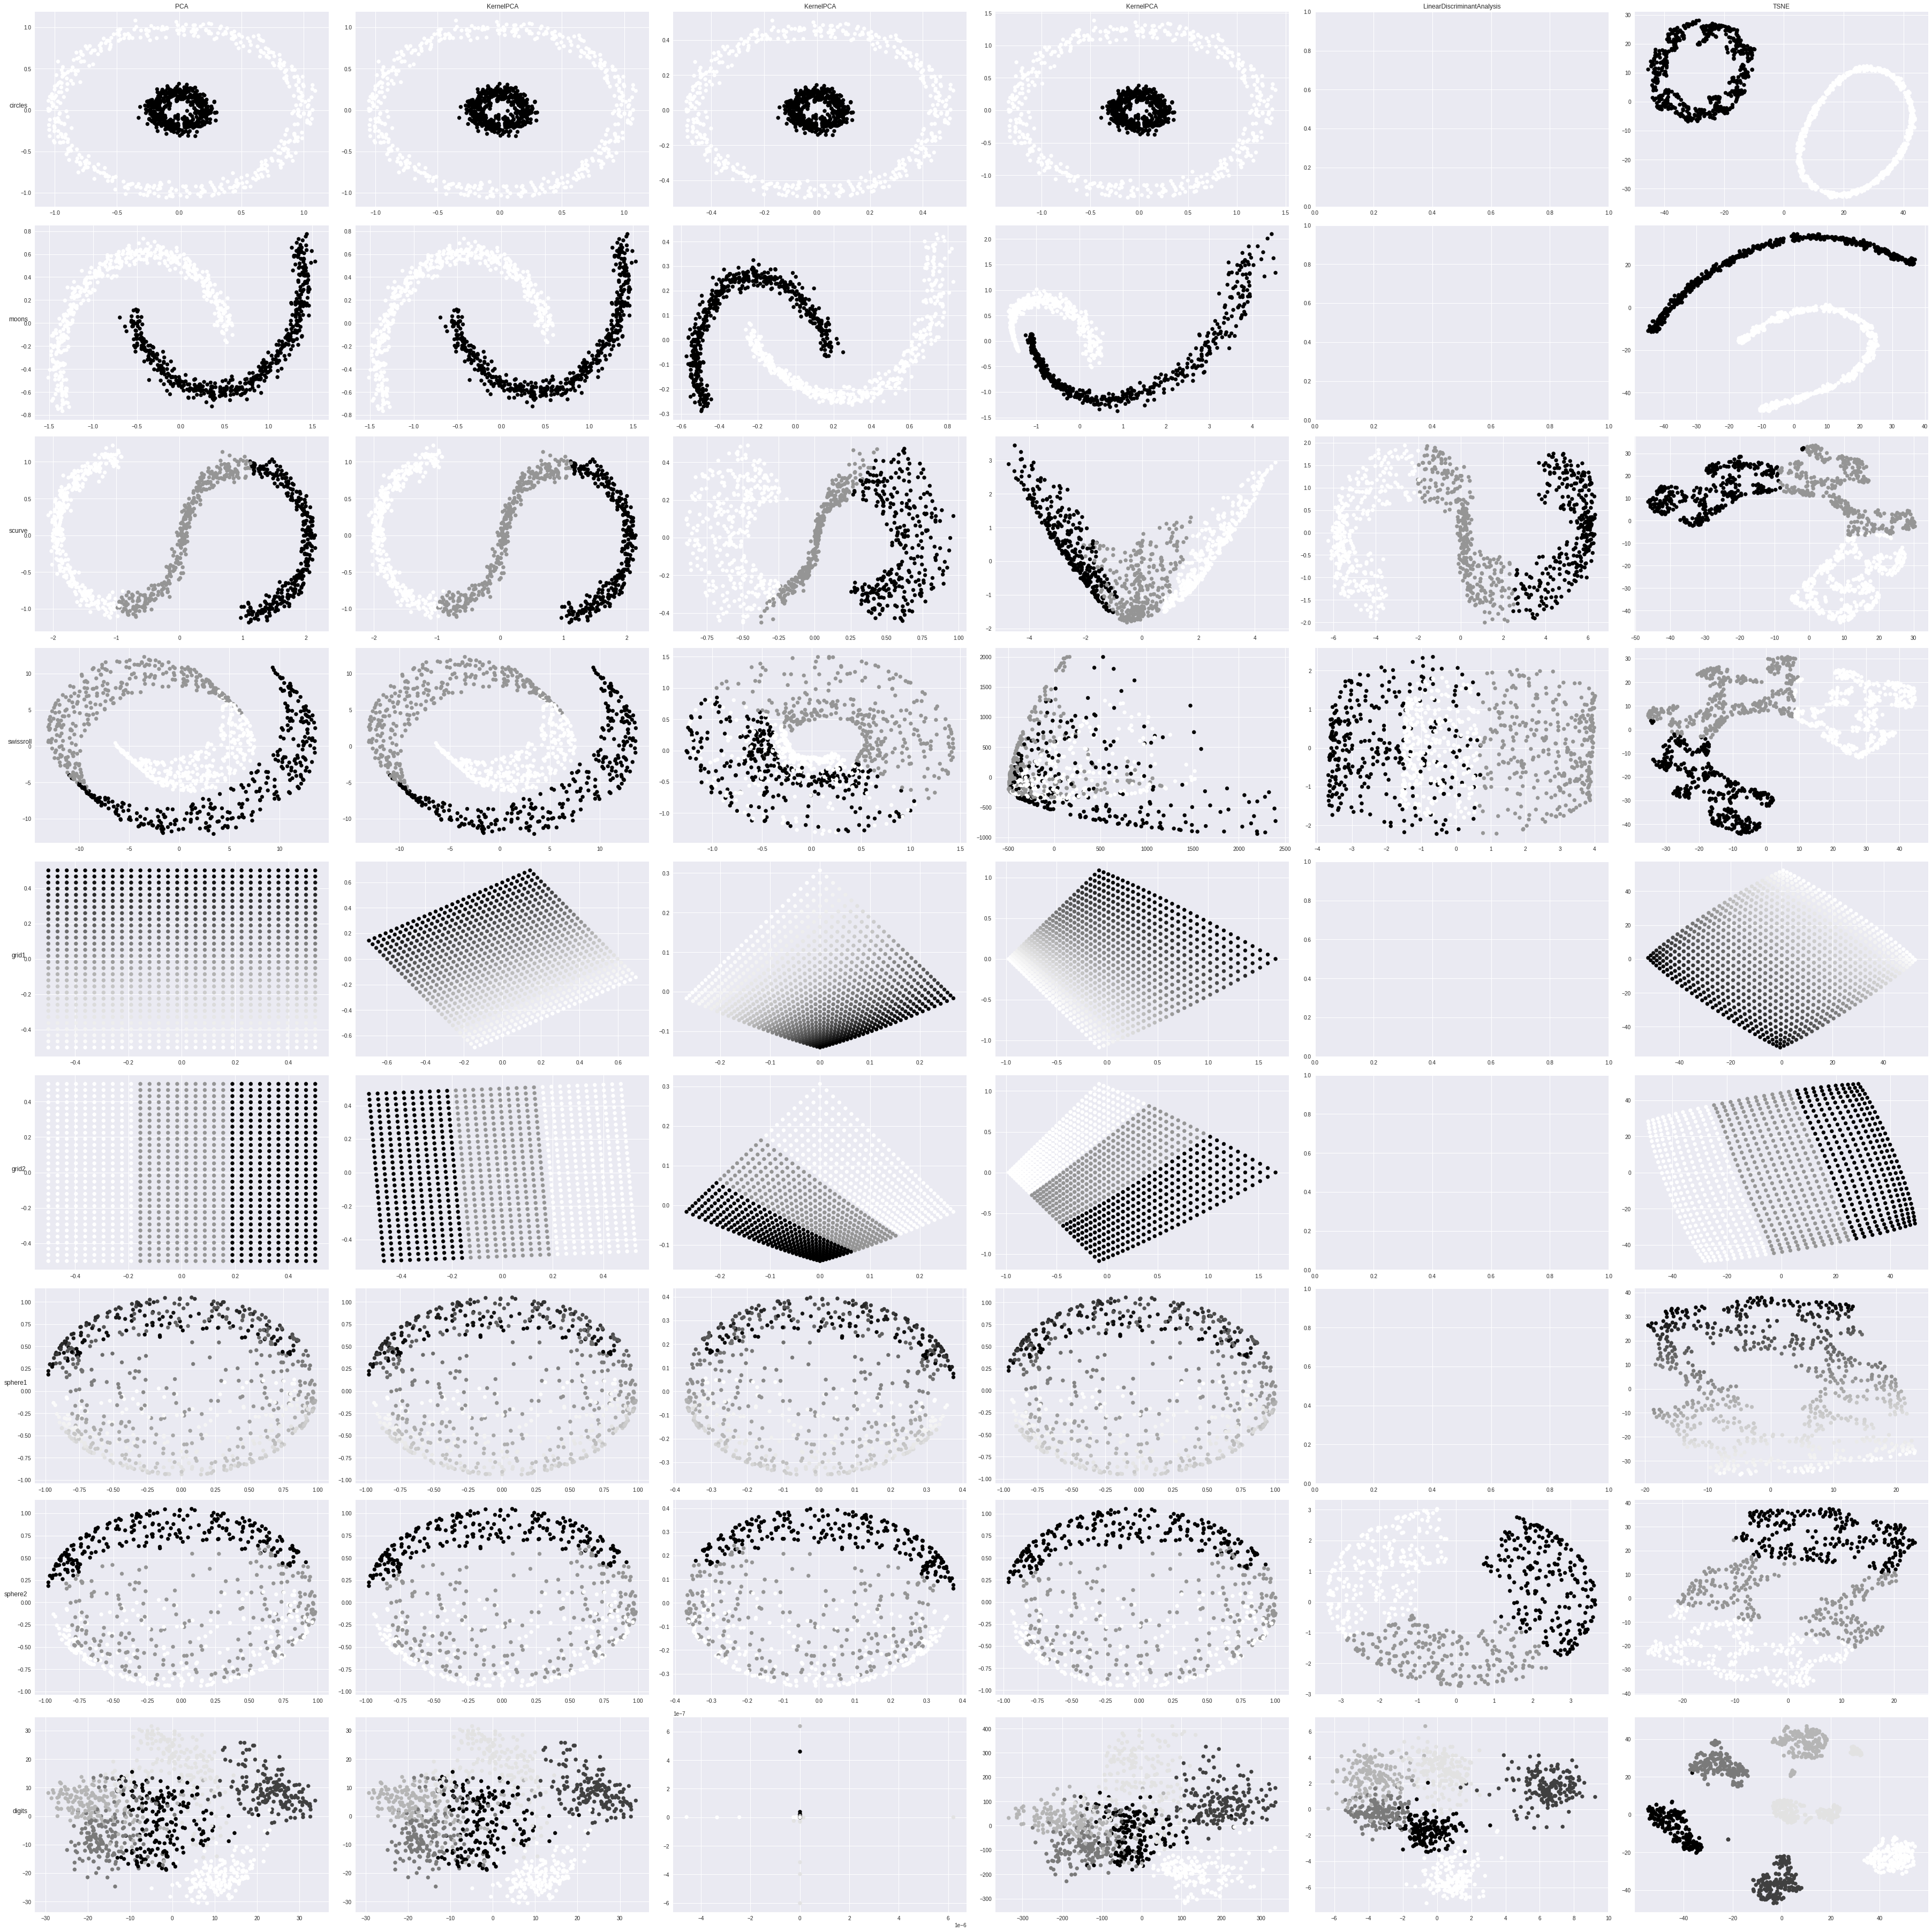

In [22]:
methodes = [
    PCA(n_components=2),
    
    KernelPCA(n_components=2, kernel='linear'),
    KernelPCA(n_components=2, kernel='sigmoid'),
    KernelPCA(n_components=2, kernel='poly'),
    
    LinearDiscriminantAnalysis(n_components=2),
    TSNE(n_components=2),
]

figsize = figsize = (50, 50)
rows = len(gen_datasets)
cols = len(methodes)

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
for i_r,dataset in enumerate(gen_datasets):
    print(dataset, ' ....')
    X, y = gen_datasets[dataset]['x'], gen_datasets[dataset]['y']
    
    for i_c, mth in enumerate(methodes):
        try:
            trnsfrm = mth.fit_transform(X,y)
            axs[i_r,i_c].scatter(trnsfrm[:,0],trnsfrm[:,1],c=y)
        except:
            print('error ', mth.__class__.__name__)
            pass
        
for ax, col in zip(axs[0], methodes):
    ax.set_title(col.__class__.__name__)

for ax, row in zip(axs[:,0], gen_datasets):
    ax.set_ylabel(row, rotation=0, size='large')

- On remarque que t-SNE arrive à mieux séparer les données sur la plupart des datatsets
- LDA ne marche que sur des instances ou les labels ne sont pas continues, de plus il faut que nombre de composantes soit sup au nombre de classes.
- On remarque que KPCA_poly arrive à mieux séparer les données que KPCA_sigmoid et KPCA_linear sur certains datasets.
- On remarque que PCA et KPCA_linear sont quasi-équivalent.

circles  ....
moons  ....
scurve  ....
swissroll  ....
grid1  ....
error  LinearDiscriminantAnalysis
grid2  ....
sphere1  ....
error  LinearDiscriminantAnalysis
sphere2  ....
digits  ....


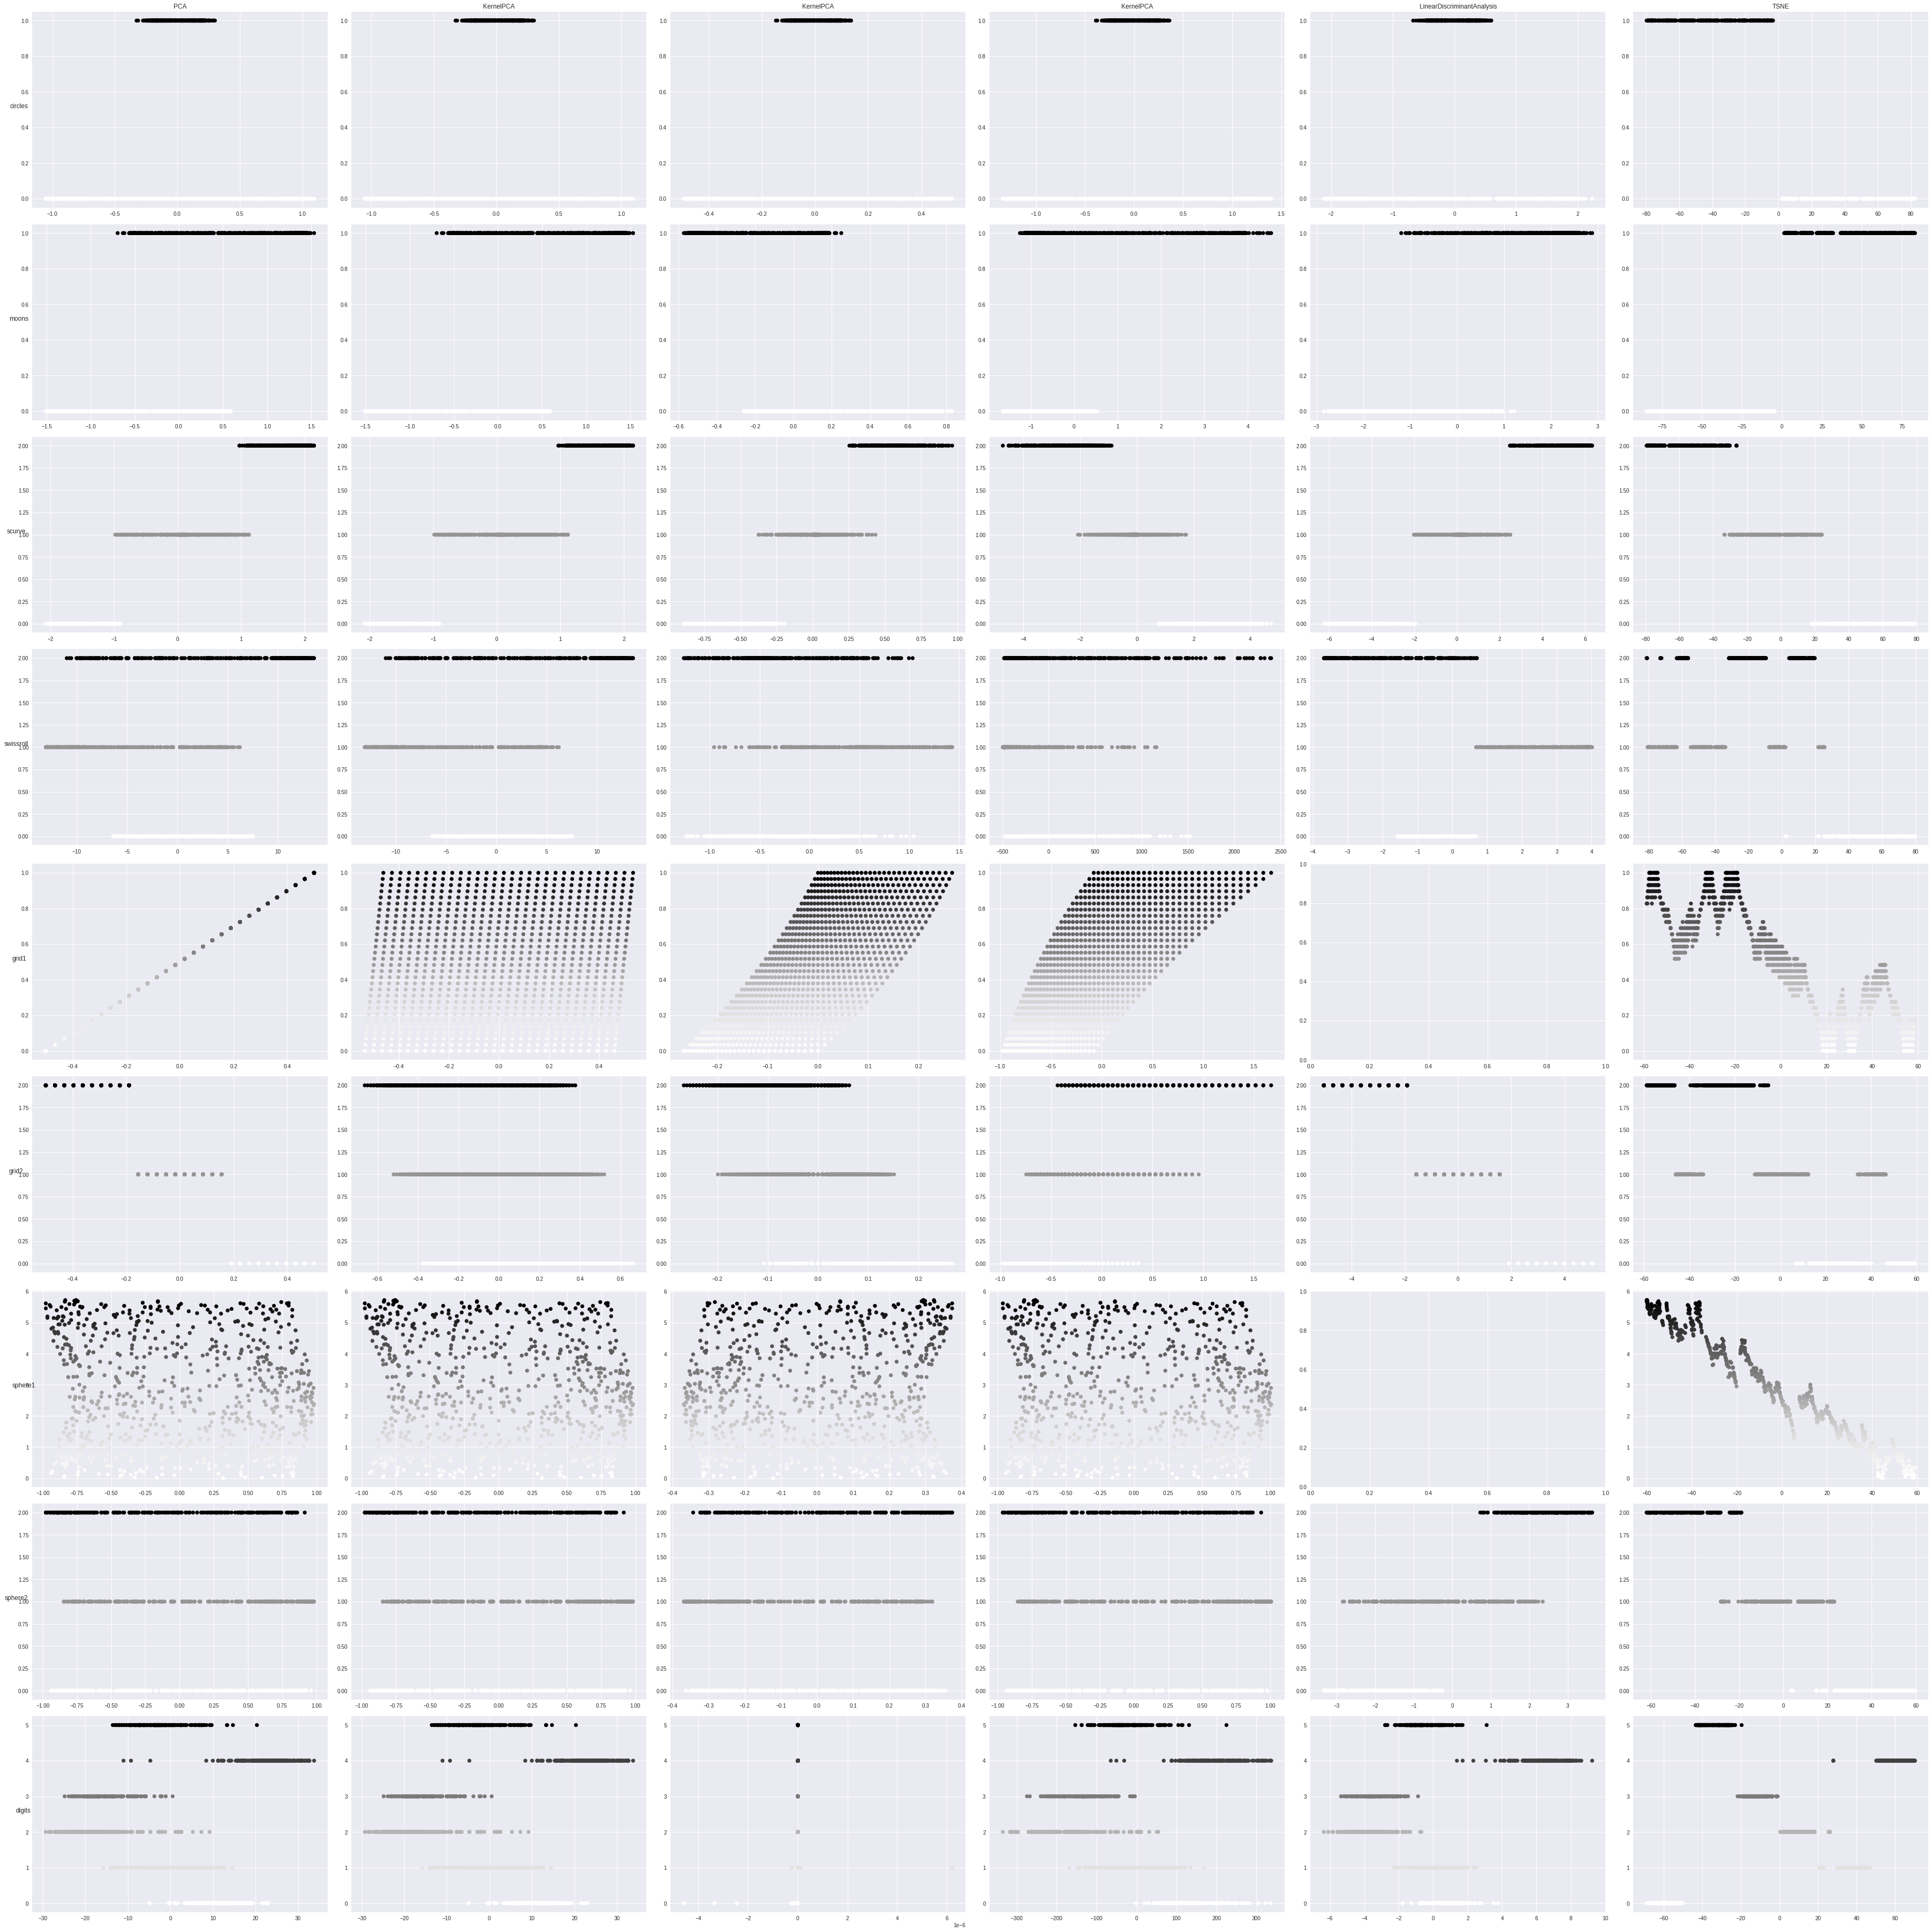

In [24]:
methodes = [
    PCA(n_components=1),
    
    KernelPCA(n_components=1, kernel='linear'),
    KernelPCA(n_components=1, kernel='sigmoid'),
    KernelPCA(n_components=1, kernel='poly'),
    
    LinearDiscriminantAnalysis(n_components=1),
    TSNE(n_components=1),
]

figsize = figsize = (50, 50)
rows = len(gen_datasets)
cols = len(methodes)

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
for i_r,dataset in enumerate(gen_datasets):
    print(dataset, ' ....')
    X, y = gen_datasets[dataset]['x'], gen_datasets[dataset]['y']
    
    for i_c, mth in enumerate(methodes):
        try:
            trnsfrm = mth.fit_transform(X,y)
            axs[i_r,i_c].scatter(trnsfrm[:,0],y,c=y)
        except:
            print('error ', mth.__class__.__name__)
            pass
        
for ax, col in zip(axs[0], methodes):
    ax.set_title(col.__class__.__name__)

for ax, row in zip(axs[:,0], gen_datasets):
    ax.set_ylabel(row, rotation=0, size='large')

- On remarque que la représentation 1D est plus "clair"
- La plupart des méthodes arrive à bien séparer les données.
    - À part pour le dataset grid et sphere